In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from transformers import BertModel, BertTokenizer


model = BertModel.from_pretrained('bert-base-cased')
position_embeddings = model.embeddings.position_embeddings.weight.data.numpy()[1:127]
position_embeddings_normalized = position_embeddings / np.linalg.norm(position_embeddings, axis=1)[:, np.newaxis]

vectors = position_embeddings
pca = PCA(n_components=3)
X_pca3D = pca.fit_transform(vectors)

top_rotation_matrix = [
    [0, -0.6, 0.7],
    [0, 0.7, 0.6],
    [-1, 0, 0]
]


X_top = np.dot(X_pca3D, top_rotation_matrix)
X_top_2D = X_top[:, :2]
X_top_avg = np.mean(X_top_2D, axis=0)  
X_top_centered = X_top_2D - X_top_avg
X_top_centered_normalized = X_top_centered / np.linalg.norm(X_top_centered, axis=1)[:, np.newaxis]

In [33]:
X_top_2D

array([[-0.03543006,  0.11452904],
       [-0.0840084 ,  0.14718421],
       [-0.06352232,  0.1473009 ],
       [-0.11925986,  0.08792978],
       [-0.10687234,  0.10033854],
       [-0.14580442,  0.06094913],
       [-0.13600157,  0.08626691],
       [-0.13197213, -0.01145767],
       [-0.14146808, -0.00787211],
       [-0.0909427 ,  0.01287842],
       [-0.08678445, -0.02687715],
       [-0.02171101, -0.00798132],
       [-0.02086866, -0.05642751],
       [ 0.03101891,  0.0477966 ],
       [ 0.07816252,  0.02250333],
       [ 0.07284552,  0.02687348],
       [ 0.12891345,  0.06791175],
       [ 0.11262935,  0.09961881],
       [ 0.15762886,  0.15841599],
       [ 0.13690688,  0.09804564],
       [ 0.12588648,  0.16617108],
       [ 0.14248192,  0.19918446],
       [ 0.10672505,  0.2032523 ],
       [ 0.12831394,  0.22104743],
       [ 0.07462124,  0.20855632],
       [ 0.0852523 ,  0.30492954],
       [ 0.06079492,  0.26308513],
       [ 0.02218281,  0.27592814],
       [ 0.02164729,

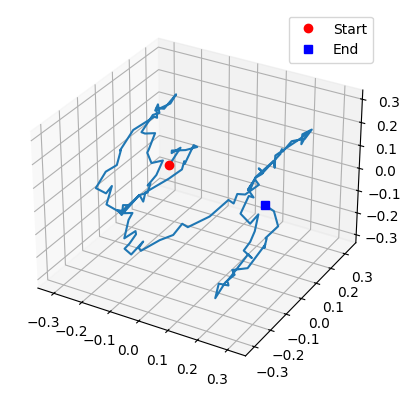

<Figure size 640x480 with 0 Axes>

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_pca3D[:, 0], X_pca3D[:, 1], X_pca3D[:, 2])
ax.plot(X_pca3D[0, 0], X_pca3D[0, 1], X_pca3D[0, 2], 'ro', label='Start')
ax.plot(X_pca3D[-1, 0], X_pca3D[-1, 1], X_pca3D[-1, 2], 'bs', label='End')
ax.legend()
plt.show()

fig = plt.figure()


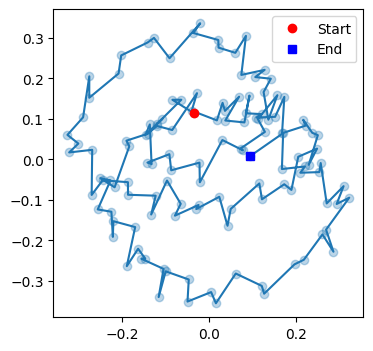

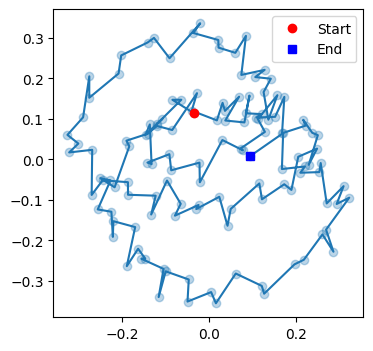

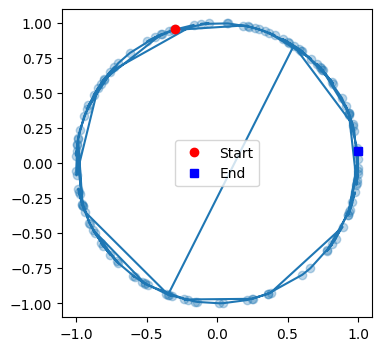

In [31]:
def plot_with_start_stop(vectors):
    plt.figure(figsize=(4, 4))
    plt.scatter(vectors[:, 0], vectors[:, 1], alpha = 0.3)
    plt.plot(vectors[:,0], vectors[:,1])
    plt.plot(vectors[0, 0], vectors[0, 1], 'ro', label='Start')
    plt.plot(vectors[-1, 0], vectors[-1, 1], 'bs', label='End')

    plt.legend()
    plt.show()

plot_with_start_stop(X_top)
plot_with_start_stop(X_top_centered)
plot_with_start_stop(X_top_centered_normalized)

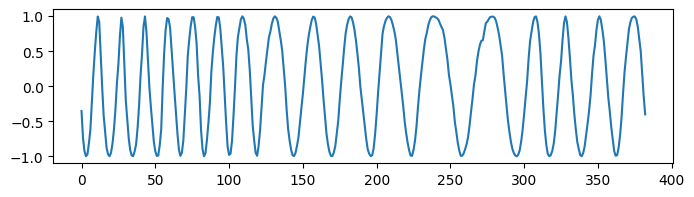

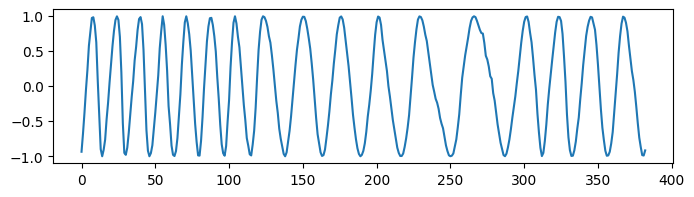

In [25]:
x_data = X_top_centered_normalized[:, 0]
y_data = X_top_centered_normalized[:, 1]

plt.figure(figsize=(8, 2))
plt.plot(x_data)
plt.show()

plt.figure(figsize=(8, 2))
plt.plot(y_data)
plt.show()



Dominant frequency: 0.0625 Hz


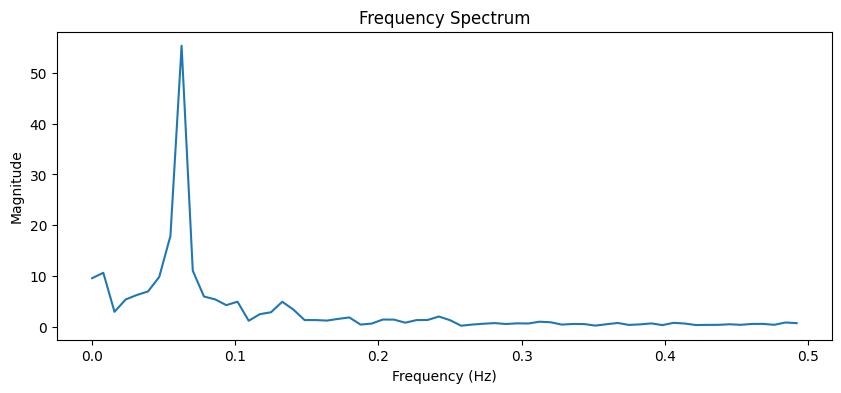

In [27]:
y = x_data[:128]
t = np.arange(0, len(y))

y_fft = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(y), d=(t[1] - t[0]))  # d is the sample spacing

# Magnitude of the FFT
magnitude = np.abs(y_fft)

# Find the index of the maximum magnitude
peak_index = np.argmax(magnitude)

# Find the dominant frequency
dominant_frequency = np.abs(frequencies[peak_index])

print("Dominant frequency:", dominant_frequency, "Hz")

# Optionally plot the frequency spectrum
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])  # plot only the positive frequencies
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [28]:
384/17

22.58823529411765